## 将000-GPA里的最后结果封装成一个方法,测试其他专业

In [1]:
import jutil
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [4]:
def get_gpa_all(speciality_code):
    '''得到该专业每个学生总的gpa数据'''
    sql = "select student_name,gpa from exam_mark_rank_student where speciality_code='%s' and not gpa is null" % speciality_code
    df = jutil.load_pd_df(sql)
    gpa = list(df['gpa'])
    gpa1 = [round(x,1) for x in gpa]
    return Counter(gpa1)

In [36]:
def get_gpa_subject(speciality_code):
    '''得到该专业的每门课程绩点'''
    sql2 = "select student_name,course_name,gpa from exam_mark_rank_all where speciality_code='%s' and not gpa is null" % speciality_code
    df2 = jutil.load_pd_df(sql2)
    groupd = df2.groupby('course_name')
    gpa3 = []
    for name,group in groupd:
        gpa3.append(list(group['gpa']))
    return gpa3

In [37]:
def fit_draw(d_gpa,is_draw=True):
    '''先拟合再绘制'''
    gnow = dict(sorted(d_gpa.items()))
    x = list(gnow.keys())
    y = list(gnow.values())
    z1 = np.polyfit(x,y,3)
    yval = np.polyval(z1,x)
    plot1=plt.plot(x, y, '*',label='old')
    plot2=plt.plot(x, yval,label='new')
    if is_draw:
        plt.show()

In [32]:
def gpa_test(speciality_code,ylim=None):
#     plt.subplot(121)
    # 先拟合总的
    fit_draw(get_gpa_all(speciality_code))
#     plt.subplot(122)
    # 再拟合分的
    for g in get_gpa_subject(speciality_code):
        gg = [round(x,1) for x in g]
        gg = Counter(gg)
        if len(gg)>1:
            fit_draw(gg,is_draw=False)
    if ylim!=None:
        plt.ylim((0,ylim))
    plt.show()

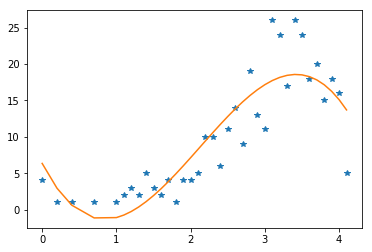

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """


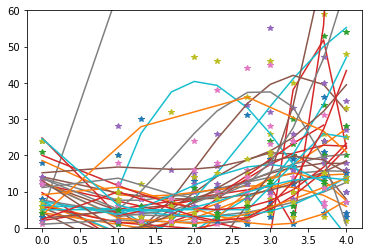

In [33]:
gpa_test('1301',60)

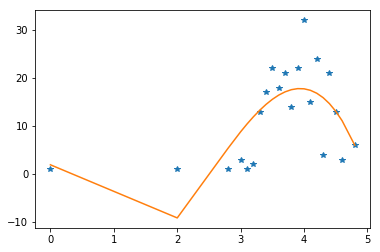

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/

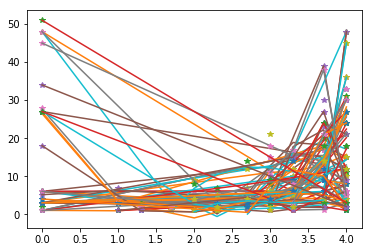

In [28]:
gpa_test('1006')

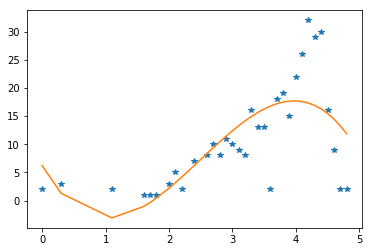

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/

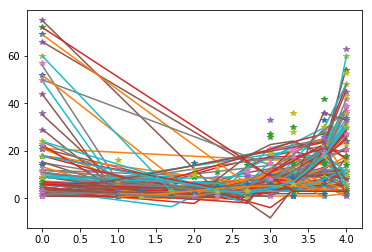

In [29]:
gpa_test('0309')

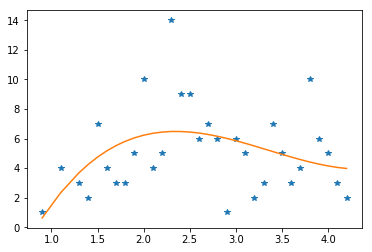

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """


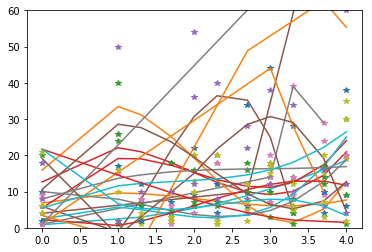

In [34]:
gpa_test('1305',60)

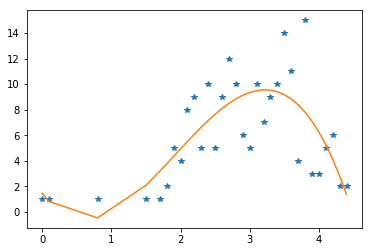

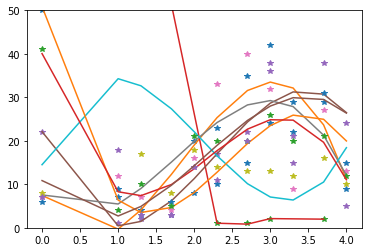

In [35]:
gpa_test('0403',50)